In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import argparse
import numpy as np
from scipy.optimize import curve_fit

In [41]:
parser = argparse.ArgumentParser(description='')
parser.add_argument('--file', '-f', type=list, help='Input file path')
files = ['/home/robertkralik/Documents/School/PhysicsWork/HyperKPMTValidation/IntegrationRangeCharacterisation/IntegrationRangeCharacterisation.csv']
options = ['-f', files]
args = parser.parse_args(args=options)

plt.style.use('seaborn-v0_8-colorblind')

In [42]:
brand_dict = {"ham": "Hamamatsu", "nnvt" : "NNVT", "NNVT":"NNVT", "HAM": "Hamamatsu"}
markers = ['o', 's', 'v', '^']
colors = ("b", "orange", "g", "r", "c", "m", "y", "k")

# Marker size is a bit small by default
msize = 20 #15
fontsize = 15

In [43]:
fname = args.file[0]
df = pd.read_csv(fname)

# Assumes standarde file naming format
def get_v_from_fname(row):
    base = Path(row["fname"]).stem

    # Get brand model and voltage from filename
    brand, model, voltage = base.split("_")
    brand = brand_dict[brand]
    # Get rid of "v" in string if there
    if voltage[-1] == "V" or voltage[-1] == "v":
        voltage = voltage[:-1]

    return brand, model, float(voltage)

# Expand here means when apply returns multiple values, they get assigned to
# each given new column
df[["brand","model","v"]] = df.apply(get_v_from_fname, axis="columns",
                                     result_type="expand")

# Sort values by angles is in order
df = df.sort_values(["v","gate"], ascending=True)

# Group by the model and plot each value
df_group = df.groupby("v")

chisqr


<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_339351/920884349.py:5: SyntaxWarning: invalid escape sequence '\c'
  "$\chi^{2}$ / NDoF", "Single Photo Electron Charge [pC]", "Single Photo Electron $\sigma$", "Gain", "Peak-to-Valley ratio (from fit)", "Peak-to-Valley ratio (from histogram)", "Single Photo Electron resolution", "True number of Photo Electrons"
/tmp/ipykernel_339351/920884349.py:5: SyntaxWarning: invalid escape sequence '\s'
  "$\chi^{2}$ / NDoF", "Single Photo Electron Charge [pC]", "Single Photo Electron $\sigma$", "Gain", "Peak-to-Valley ratio (from fit)", "Peak-to-Valley ratio (from histogram)", "Single Photo Electron resolution", "True number of Photo Electrons"


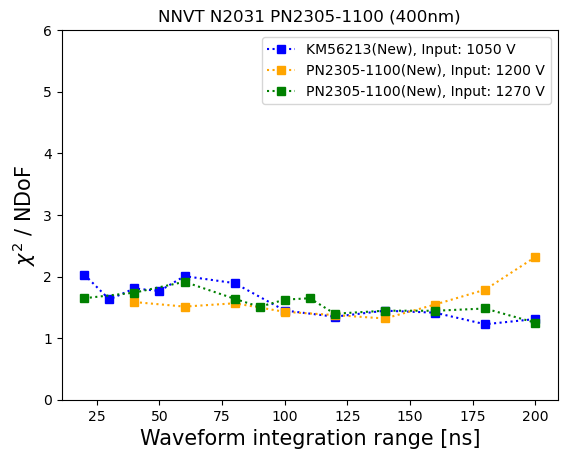

SPE_charge


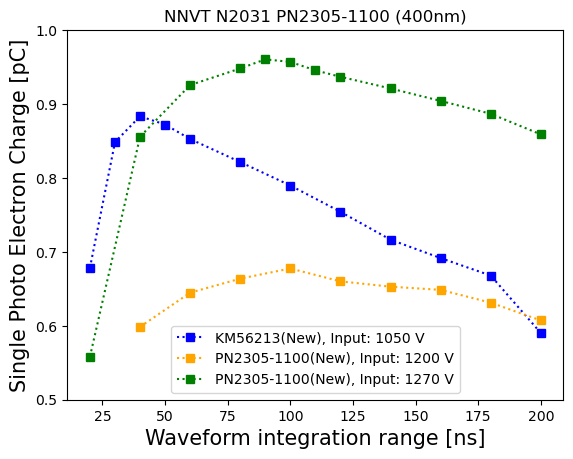

SPE_sigma


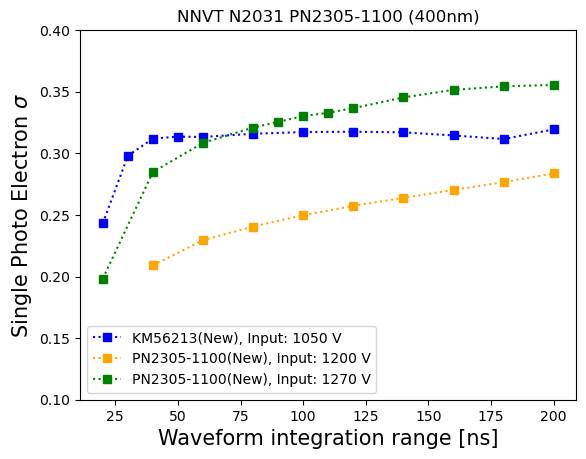

gain


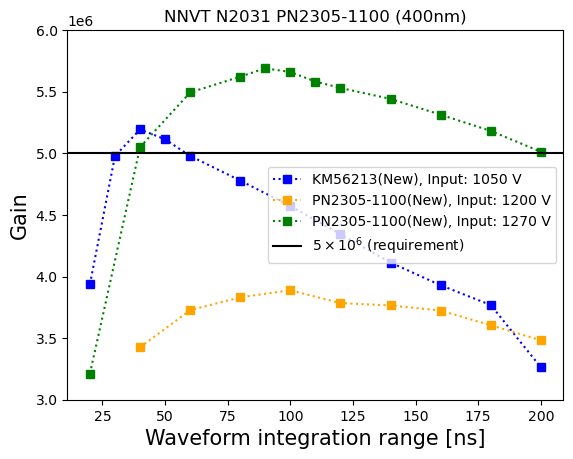

pv_r


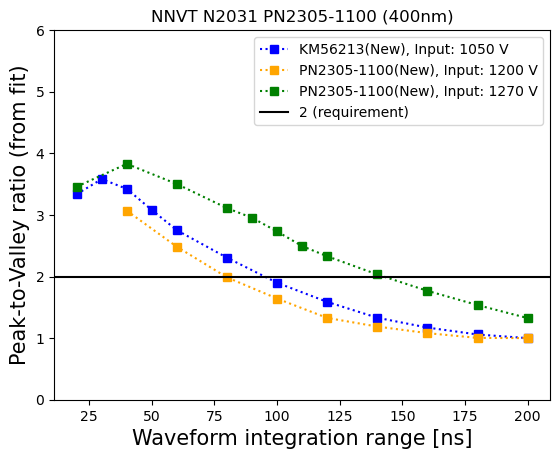

pv_r_hist


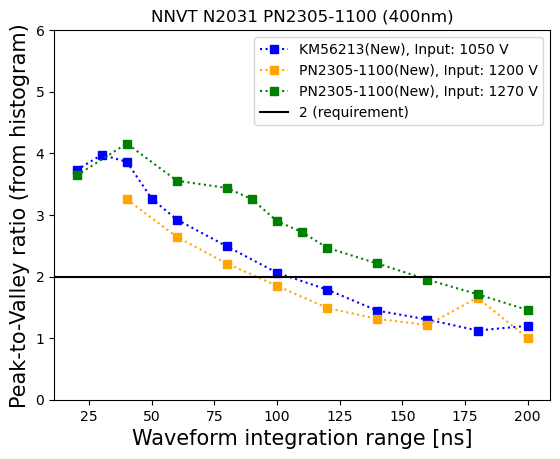

pe_res


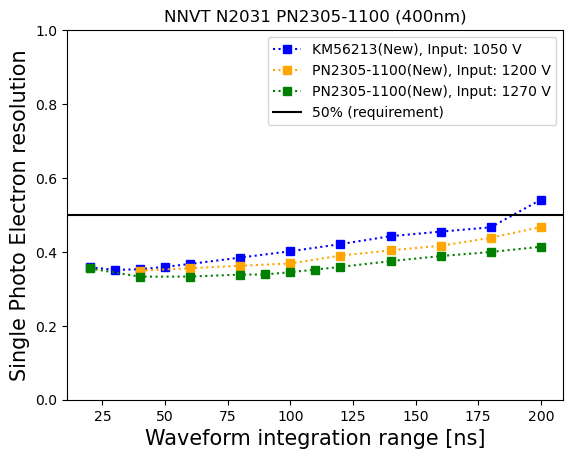

true_PE


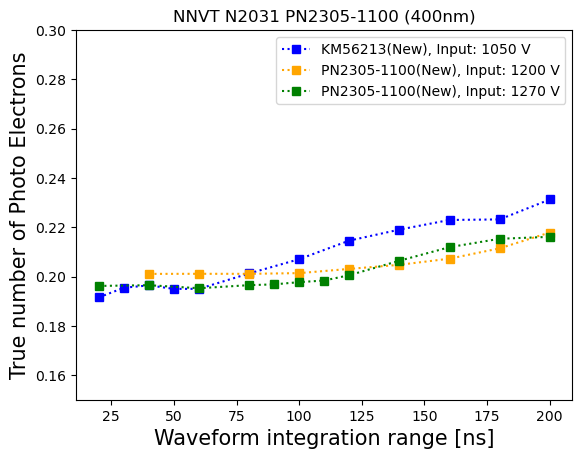

In [44]:
variables = [
    "chisqr", "SPE_charge", "SPE_sigma", "gain", "pv_r", "pv_r_hist", "pe_res", "true_PE"
]
label = [
    "$\chi^{2}$ / NDoF", "Single Photo Electron Charge [pC]", "Single Photo Electron $\sigma$", "Gain", "Peak-to-Valley ratio (from fit)", "Peak-to-Valley ratio (from histogram)", "Single Photo Electron resolution", "True number of Photo Electrons"
]
range = [
    (0,6.), (0.5,1.), (0.1,0.4), (3E+6,6E+6), (0,6), (0,6), (0,1.), (0.15,0.3)
]

idx=0
for var in variables:
    fig, ax = plt.subplots()
    marker = markers[1]
    linestyle = ':'
    print(var)

    idx_hv=0
    for hv,df_hv in df_group:
        #ax.scatter(2*df['gate'].values, df[var].values, marker="D")
        ax.plot(2*df_hv['gate'].values, df_hv[var].values, marker=marker,
                color=colors[idx_hv],
                linestyle=linestyle, label=f"{df_hv['model'].values[0]}, Input: %.f V" % hv)
        idx_hv += 1

    ax.set_ylim([range[idx][0],range[idx][1]])
    ax.set_xlabel("Waveform integration range [ns]",fontsize=fontsize)
    ax.set_ylabel(f"%s"%label[idx], fontsize=fontsize)
    ax.title.set_text("NNVT N2031 PN2305-1100 (400nm)")

    if var=='gain':
        ax.axhline(5e6, linestyle='-', color='black', label=r'$5\times10^6$ (requirement)')
    if var=='pe_res':
        ax.axhline(0.5, linestyle='-', color='black', label=r'50% (requirement)')
    if var=='pv_r' or var=='pv_r_hist':
        ax.axhline(2, linestyle='-', color='black', label=r'2 (requirement)')
    ax.legend()

    #fig.set_size_inches(14,8)
    fig.savefig("IntegrationRange_"+var+".png",bbox_inches='tight')
    plt.show()

    idx += 1